In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
import copy
from tqdm import tqdm

from Robot import Robot
from Layer import Layer


Bad key text.latex.preview in file C:\Users\maxal\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\maxal\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\maxal\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality parameter.')
You proba

In [2]:
sigm = lambda x: 1/(1+np.exp(-x))

In [3]:
#Red Neuronal
def GetBrain():
    '''Define la topologia de la red neuronal'''
    l0 = Layer(1,1, lambda x: x)
    l1 = Layer(1,5,sigm,rate=0.5)
    l2 = Layer(5,1,sigm,rate=0.5)
    
    Brain = [l0,l1,l2]
    return Brain 

In [4]:
def GetRobots(N):
    
    Robots = []
    
    for i in range(N):
        
        Brain = GetBrain()
        r = Robot(dt,Brain,Id=i)
        Robots.append(r)
        
    return Robots

## Evolucion temporal

In [5]:
dt = 0.1
t = np.arange(0.,5.,dt)

In [6]:
Robots = GetRobots(200)
Robots[0]

In [7]:
def GetPlot():
    
    fig = plt.figure(figsize=(8,4))
    ax = fig.add_subplot(1,2,1)
    ax1 = fig.add_subplot(1,2,2)
    
    ax.set_xlim(-1.05,1.05)
    ax.set_ylim(-1.,1.)
 
    return ax,ax1

---

## Time Evolution

In [8]:
def TimeEvolution(Robots,e,Plot=True):
    
  
    for it in range(t.shape[0]):
        '''it es un momento del tiempo'''
        
        if Plot:
        
            clear_output(wait=True)
        
            ax,ax1 = GetPlot()
            ax1.set_ylim(0.,1.)
        
            ax.set_title('t = {:.3f}'.format(t[it]))
        
        Activation = np.zeros(len(Robots))
        
        for i,p in enumerate(Robots):
            
            #-----------EVOLUCION------------#
            p.Evolution()
            #--------------------------------#
        
            # Activacion cerebral
            '''miramos la activacion del cerebro'''
            Act = p.BrainActivation(p.GetR()[0])
            Activation[i] = Act
            
            # Region donde aumentamos los pasos para el fitness      
            if Plot and i <5: # Solo pintamos los primeros 5, por tiempo de computo
                ax.scatter(p.r[0],p.r[1],label='Id: {}, Steps: {:.0f}'.format(p.Id,p.Steps))
                ax.quiver(p.r[0],p.r[1],p.v[0],p.v[1])
                
        # Pintamos la activaciones de los primeros 5
        if Plot:
            ax1.plot(np.arange(0,len(Robots[:5]),1),Activation[:5],marker='o',color='b',label='Activation')
            ax1.axhline(y=0.7,color='r')
        
        if Plot:
        
            ax.legend(loc=0)  
            ax1.legend(loc=0)
            plt.show()
            time.sleep(0.00001)

----

## Algoritmo Evolutivo

In [9]:
# Definimos la rutina de entrenamiento
def Genetic(Robots, epochs = 200, Plot = True, Plottime=False):
    '''
    Plot: True Muestra el plot de la activacion de la neurona
    Plottime: True muestra las activaciones delos primeros 5 robots
    '''
    
    # Porcentaje de robots elegidos en cada epoch
    N = int(0.7*len(Robots))
    
    # Vector de la mejor aptitud en cada epoca
    FitVector = np.array([])
    
    x = np.linspace(-1,1,20)
    Act = np.zeros_like(x)
    
    for e in range(int(epochs)):
        
        # Reiniciamos y mutamos los pesos cada vez que empezamos una nueva epoca
        for p in Robots:
            p.Reset() 
            p.Mutate()
            
        #***********Evolucionamos************
        TimeEvolution(Robots,e,Plottime) # Para entrenar deje Plottime=False
        
        # Actualizamos fitness de cada robot
        for p in Robots:
            p.SetFitness()
        
        #ordenar los bots del más apto al menos apto
        
        scores = [(p.Fitness,p) for p in Robots]
        scores.sort(key = lambda x: x[0], reverse = False)
        
        
        # Guardamos el mejor fitness y el mejor robot
        best_fitness = scores[0][0]
        best_bot = scores[0][1] 
        
        # Copiado profundo
        
        Temp = [r[1] for i,r in enumerate(scores) if i < N]
        for i,r in enumerate(Robots):
            j = i%N
            Robots[i] = copy.deepcopy(Temp[j])

        
        FitVector = np.append(FitVector,best_fitness)
        
        for i in range(len(x)):
            Act[i] = best_bot.BrainActivation(x[i])
        
        clear_output(wait=True)
        
        print('Epoch:', e)
        print('Number of robots:', N)
        print('Last Fitness:', FitVector[-1])
        
        
        if Plot:
            
            ax,ax1 = GetPlot()
            ax.plot(x,Act,color='k')
            ax.set_ylim(0.,1)
            ax.axhline(y=0.7,ls='--',color='r',label='Threshold')
            ax.axvline(x = 1)
            ax.axvline(x=-1)
            
            ax1.set_title('Fitness')
            ax1.plot(FitVector)
        
            ax.legend(loc=0)
            
            plt.show()
            
            time.sleep(0.01)
        
        
    
    return best_bot, FitVector

Epoch: 140
Number of robots: 140
Last Fitness: 0.08636977058029689


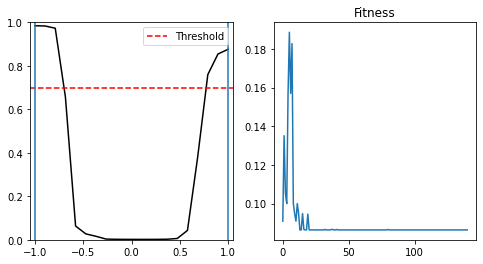

In [ ]:
Best, FitVector= Genetic(Robots, Plot=True,Plottime=False)

In [ ]:
print("Informacion del robot y del cerebro")
print(f"Overfit penalty: {Best.overfitPenalty}")
print(f"Learning rate: {Best.Layers[0].rate}")

In [ ]:
TimeEvolution([Best],e=1,Plot=True)

**Informacion de la red neuronal del mejor robot**

In [ ]:
print("Primera capa")
print(f"W = {Best.Layers[0].W}, b = {Best.Layers[0].b} ")

print("\nSegunda capa")
print(f"W = {Best.Layers[1].W} \nb = {Best.Layers[1].b} ")

print("\nTercera capa")
print(f"W = {Best.Layers[2].W} \nb = {Best.Layers[2].b} ")
